**Data Analysis of Maharashtra Assembly Election Result 2024**

In [ ]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

The structure and contents of the election result dataset

In [503]:
df = pd.read_csv("maha_results_2024.csv")
df.describe()

,AC No,Sl no,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,140.219033,9.187839,14478.816230,121.660262,14600.476492,6.509916
std,82.337173,6.085659,34110.425249,314.603824,34386.008759,15.025386
min,1.000000,1.000000,26.000000,0.000000,26.000000,0.010000
25%,68.000000,4.000000,231.000000,1.000000,233.000000,0.110000
50%,135.000000,8.000000,630.500000,4.000000,635.500000,0.280000
75%,215.000000,13.000000,2451.000000,22.000000,2462.250000,1.120000
max,288.000000,35.000000,234678.000000,2645.000000,235323.000000,80.360000


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC No           4424 non-null   int64  
 1   AC Name         4424 non-null   object 
 2   Sl no           4424 non-null   int64  
 3   Candidate       4424 non-null   object 
 4   Party           4424 non-null   object 
 5   EVM Votes       4424 non-null   int64  
 6   Postal Votes    4424 non-null   int64  
 7   Total Votes     4424 non-null   int64  
 8   Vote Share (%)  4424 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 311.2+ KB


In [505]:
df.head()

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
0,1,AKKALKUWA,1,AMSHYA FULJI PADVI,Shiv Sena,72411,218,72629,31.55
1,1,AKKALKUWA,2,ADV K C PADAVI,Indian National Congress,69122,603,69725,30.29
2,1,AKKALKUWA,3,PADMAKAR VIJAYSING VALVI,Bharat Adivasi Party,8640,192,8832,3.84
3,1,AKKALKUWA,4,ENG. JELSING BIJALA PAWARA,Independent,2895,16,2911,1.26
4,1,AKKALKUWA,5,SARYA DHARMA PADVI,Independent,1466,7,1473,0.64


**Univariate Analysis** - Which party has the most contesting candidates.

In [646]:
dict(df["Party"].value_counts())

{'Independent': 2086,
 'None of the Above': 288,
 'Bahujan Samaj Party': 237,
 'Vanchit Bahujan  Aaghadi': 200,
 'Bharatiya Janata Party': 149,
 'Maharashtra Navnirman sena': 125,
 'Indian National Congress': 101,
 'Shiv Sena (Uddhav Balasaheb Thackeray)': 95,
 'Rashtriya Samaj Paksha': 93,
 'Nationalist Congress Party- Sharadchandra Pawar': 86,
 'Shiv Sena': 81,
 'Nationalist Congress Party': 59,
 'Peoples Party of India (Democratic)': 44,
 'Prahar Janshakti Party': 38,
 'Maharashtra Swarajya party': 32,
 'Republican Party of India (A)': 31,
 'Aazad Samaj Party (Kanshi Ram)': 28,
 'Bahujan Republican  Socialist Party': 22,
 'Republican Sena': 21,
 'Swabhimani Paksha': 19,
 'Sambhaji Brigade Party': 19,
 'Peasants And Workers Party of India': 18,
 'Right to Recall Party': 18,
 'Janhit Lokshahi Party': 18,
 'All India Majlis-E-Ittehadul Muslimeen': 17,
 'All India Majlis-E-Inquilab-E-Millat': 16,
 'All India Forward Bloc': 16,
 'Rashtriya Swarajya Sena': 15,
 'Bhim Sena': 14,
 'Jan Janw

In [647]:
parties_to_include = ['Bharatiya Janata Party', 'Shiv Sena', 'Nationalist Congress Party', 
                      'Shiv Sena (Uddhav Balasaheb Thackeray)',
                     'Indian National Congress',
                     'Nationalist Congress Party- Sharadchandra Pawar']

major_parties_df = df[df['Party'].isin(parties_to_include)]
major_parties_df

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
0,1,AKKALKUWA,1,AMSHYA FULJI PADVI,Shiv Sena,72411,218,72629,31.55
1,1,AKKALKUWA,2,ADV K C PADAVI,Indian National Congress,69122,603,69725,30.29
8,2,SHAHADA,1,RAJESH UDESING PADVI,Bharatiya Janata Party,145660,1179,146839,59.86
9,2,SHAHADA,2,RAJENDRAKUMAR KRISHNARAO GAVIT,Indian National Congress,92917,718,93635,38.17
12,3,NANDURBAR,1,ENGG.KIRAN DAMODAR TADAVI,Indian National Congress,77740,1203,78943,32.87
...,...,...,...,...,...,...,...,...,...
4382,286,KHANAPUR,4,VAIBHAVDADA SADASHIVRAO PATIL,Nationalist Congress Party- Sharadchandra Pawar,75071,640,75711,30.08
4394,287,TASGAON - KAVATHE MAHANKAL,1,ROHIT SUMAN R.R. ABA PATIL,Nationalist Congress Party- Sharadchandra Pawar,126478,1925,128403,54.09
4397,287,TASGAON - KAVATHE MAHANKAL,4,SANJAYKAKA PATIL,Nationalist Congress Party,99901,858,100759,42.45
4412,288,JAT,1,GOPICHAND KUNDLIK PADALKAR,Bharatiya Janata Party,112746,991,113737,53.39


In [651]:
def get_winner_candidate_party_count(df): 
    # Group by 'AC No' and find the index of the max 'Vote Share (%)' for each group
    # This will return the index of the maximum 'Vote Share (%)' in each constituency (AC No)
    max_indices = df.groupby('AC No')['Vote Share (%)'].idxmax()
    party_list = []
    # Iterate over the resulting indices and increment the party count
    for idx in max_indices:
        party = df.loc[idx, 'Party']
        party_list.append(party)

    element_count = collections.Counter(party_list)
    party_list = {}
    for party, count in element_count.items():
        party_list.update({party : count})
    
    sorted_party_votes_desc = dict(sorted(party_list.items(), key=lambda item: item[1], reverse=True))
    return sorted_party_votes_desc
get_winner_candidate_party_count(df)

{'Bharatiya Janata Party': 132,
 'Shiv Sena': 57,
 'Nationalist Congress Party': 41,
 'Shiv Sena (Uddhav Balasaheb Thackeray)': 20,
 'Indian National Congress': 16,
 'Nationalist Congress Party- Sharadchandra Pawar': 10,
 'Samajwadi Party': 2,
 'Independent': 2,
 'Jan Surajya Shakti': 2,
 'Rashtriya Yuva Swabhiman Party': 1,
 'Rashtriya Samaj Paksha': 1,
 'All India Majlis-E-Ittehadul Muslimeen': 1,
 'Communist Party of India  (Marxist)': 1,
 'Peasants And Workers Party of India': 1,
 'Rajarshi Shahu Vikas Aghadi': 1}

In [649]:
def getPartyContestedSeats():
    party_with_seats_contested = dict(major_parties_df["Party"].value_counts())
    party_with_seats_contested_sorted = dict(sorted(party_with_seats_contested.items()))
    return party_with_seats_contested_sorted

getPartyContestedSeats()

{'Bharatiya Janata Party': 149,
 'Indian National Congress': 101,
 'Nationalist Congress Party': 59,
 'Nationalist Congress Party- Sharadchandra Pawar': 86,
 'Shiv Sena': 81,
 'Shiv Sena (Uddhav Balasaheb Thackeray)': 95}

In [652]:
def getPartyWinSeats():
    party_with_win_seat_count = get_winner_candidate_party_count(df)
    top_6_winning_parties = dict(sorted(party_with_win_seat_count.items(), key=lambda item: item[1], reverse=True)[:6])
    return dict(sorted(top_6_winning_parties.items()))

getPartyWinSeats()

{'Bharatiya Janata Party': 132,
 'Indian National Congress': 16,
 'Nationalist Congress Party': 41,
 'Nationalist Congress Party- Sharadchandra Pawar': 10,
 'Shiv Sena': 57,
 'Shiv Sena (Uddhav Balasaheb Thackeray)': 20}

In [653]:
def getPartyStrikeRate():
    party_win_seats = getPartyWinSeats()
    party_contested_seats = getPartyContestedSeats()
    strike_rate_dict = {}
    for party in party_win_seats:
        if party in party_contested_seats:  # Ensure the party is in both dictionaries
            strike_rate = round(((party_win_seats[party] / party_contested_seats[party])*100), 2)
            #print(party, " ", party_win_seats[party] , " ", party_contested_seats[party], " ", strike_rate)    
            strike_rate_dict[party] = strike_rate 
    return strike_rate_dict

getPartyStrikeRate()   

{'Bharatiya Janata Party': 88.59,
 'Indian National Congress': 15.84,
 'Nationalist Congress Party': 69.49,
 'Nationalist Congress Party- Sharadchandra Pawar': 11.63,
 'Shiv Sena': 70.37,
 'Shiv Sena (Uddhav Balasaheb Thackeray)': 21.05}

In [725]:
columns = ['Party', 'Won Seats', 'Contested Seats', 'Strike Rate']
party_win_seats = getPartyWinSeats()
party_contested_seats = getPartyContestedSeats()
party_strike_rate = getPartyStrikeRate()

strike_rate_df = pd.DataFrame(columns = columns)

for party in party_win_seats:
    strike_rate_df = strike_rate_df.append({'Party': party, 
                                           'Won Seats': party_win_seats[party], 
                                           'Contested Seats': party_contested_seats[party],
                                           'Strike Rate': party_strike_rate[party]
                                           }, ignore_index=True)
df_sorted_desc = strike_rate_df.sort_values(by='Strike Rate', ascending=False)
df_sorted_desc = df_sorted_desc.reset_index(drop=True)

styled_df = df_sorted_desc.style.set_table_styles(
    [{'selector': 'th', 
      'props': [('background-color', 'orange'), 
                ('color', 'black'), 
                ('font-weight', 'bold'), 
                ('font-size', '14px'), 
                ('text-align', 'right')]}]
).hide_index()
styled_df

Party,Won Seats,Contested Seats,Strike Rate
Bharatiya Janata Party,132,149,88.590000
Shiv Sena,57,81,70.370000
Nationalist Congress Party,41,59,69.490000
Shiv Sena (Uddhav Balasaheb Thackeray),20,95,21.050000
Indian National Congress,16,101,15.840000
Nationalist Congress Party- Sharadchandra Pawar,10,86,11.630000


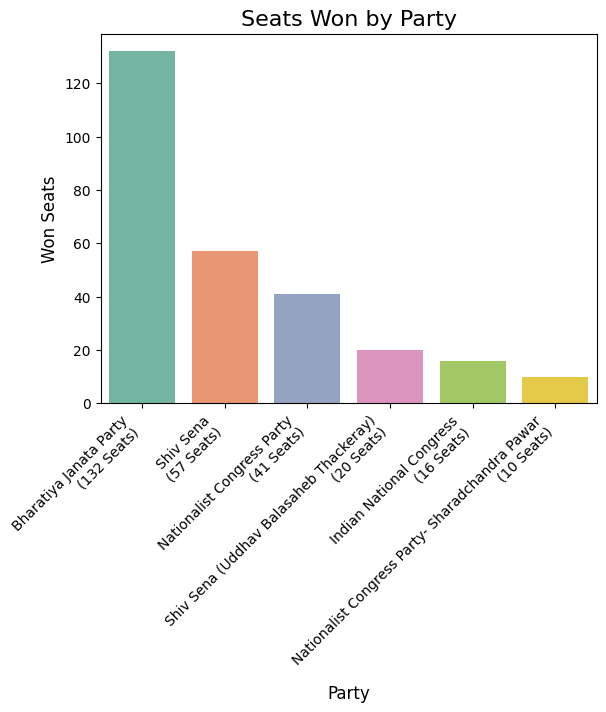

In [746]:
# Create the bar plot using seaborn
xlable = 'Party'+ str(party_win_seats[party])

sns.barplot(x='Party', y='Won Seats', data=df_sorted_desc, palette='Set2')
# Add labels and title
plt.title('Seats Won by Party', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Won Seats', fontsize=12)

# Rotate the x-axis labels for better readability
#plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(len(df_sorted_desc['Party'])), labels=[f"{party}\n({seats} Seats)" for party, seats in zip(df_sorted_desc['Party'], df_sorted_desc['Won Seats'])], rotation=45, ha='right')

# Display the plot
plt.show()

In [655]:
data = get_winner_candidate_party_count(df)
# Extract the keys and values from the dictionary
labels = list(data.keys())
sizes = list(data.values())

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, 
                             marker=dict(colors=colors), 
                             hoverinfo='label+percent+value')])

# Add a title
fig.update_layout(title="Party Vote Share Distribution")

# Show the interactive plot
fig.show()

In [366]:
top_5_lagest_vote_share_candidates = df.nlargest(5, "Vote Share (%)")
top_5_lagest_vote_share_candidates

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
4116,262,SATARA,3,SHIVENDRARAJE ABHAYSINHRAJE BHONSLE,Bharatiya Janata Party,175062,1787,176849,80.36
2396,147,KOPRI - PACHPAKHADI,1,EKNATH SAMBHAJI SHINDE,Shiv Sena,158585,475,159060,78.29
1977,116,BAGLAN,2,DILIP MANGLU BORSE,Bharatiya Janata Party,158720,961,159681,77.71
3354,219,KOPARGAON,1,ASHUTOSH ASHOKRAO KALE,Nationalist Congress Party,160042,1105,161147,77.46
89,9,SHIRPUR,1,KASHIRAM VECHAN PAWARA,Bharatiya Janata Party,176516,1557,178073,76.70


In [368]:
top_5_lowest_vote_share_candidates = df.nsmallest(5, "Vote Share (%)")
top_5_lowest_vote_share_candidates

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
869,55,NAGPUR CENTRAL,8,ADVOCATE SURAJ BALRAM MISHRA,All India Forward Bloc,26,0,26,0.01
1398,85,BHOKAR,25,SAMBHAJI RAMJI KALE,Independent,34,0,34,0.01
1424,86,NANDED NORTH,25,MAHAMAD TOUFIK MAHAMAD YUSUF,Independent,27,0,27,0.01
1425,86,NANDED NORTH,26,MOHAMMAD WASIM MOHAMMAD IQBAL,Independent,31,0,31,0.01
4088,259,KARAD NORTH,12,BALASO SHIVAJI PATIL,Independent,29,0,29,0.01


In [493]:
top_5_lagest_total_vote_candidates = df.nlargest(5, "Total Votes")
top_5_lagest_total_vote_candidates

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
3143,205,CHINCHWAD,2,JAGTAP SHANKAR PANDURANG,Bharatiya Janata Party,234678,645,235323,60.51
3182,207,BHOSARI,3,MAHESH (DADA) KISAN LANDGE,Bharatiya Janata Party,213159,465,213624,56.91
3617,233,PARLI,1,DHANANJAY PANDITRAO MUNDE,Nationalist Congress Party,193355,1534,194889,75.97
3037,198,SHIRUR,3,DNYANESHWAR ALIAS MAULI ABA KATKE,Nationalist Congress Party,191642,639,192281,59.88
3135,204,MAVAL,1,SUNIL SHANKARRAO SHELKE,Nationalist Congress Party,190731,524,191255,68.53


**Find top 5 NOTA Constituencies**

In [492]:
nota_df_new = pd.DataFrame()
for index, row in df.iterrows():
    new_df = df.loc[df["AC No"] == index+1]
    if new_df["Vote Share (%)"].notna().any():  # Checks if there is any non-NaN value
        nota_index = (new_df["Candidate"] == "NOTA").idxmax()
        nota_df = df.loc[nota_index]
        nota_df_new = nota_df_new.append(nota_df, ignore_index=True)

top_5_nota_constituencies = nota_df_new.nlargest(5, "Vote Share (%)")
top_5_nota_constituencies

,AC No,AC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share (%)
68,69.0,AHERI,13.0,NOTA,None of the Above,5813.0,12.0,5825.0,3.13
171,172.0,ANUSHAKTI NAGAR,10.0,NOTA,None of the Above,3826.0,58.0,3884.0,2.66
134,135.0,SHAHAPUR,10.0,NOTA,None of the Above,4844.0,28.0,4872.0,2.36
127,128.0,DAHANU,9.0,NOTA,None of the Above,5104.0,16.0,5120.0,2.31
0,1.0,AKKALKUWA,8.0,NOTA,None of the Above,5066.0,5.0,5071.0,2.20
